In [1]:
# import the dependencies
import pandas as pd
import numpy as np 
import random
import matplotlib.pyplot as plt
from citipy import citipy

# import the datetime module from the datetime library
from datetime import datetime

import requests
from config import weather_api_key

In [2]:
# Creating a set of random latitude and Londitude combinations
lats = np.random.uniform(low= -90.000, high=90.000, size=1500)
lngs = np.random.uniform(low= -180.000, high=180.000, size=1500)
lats_lngs = zip(lats,lngs)
lats_lngs

In [3]:
# unpacking the zip and adding it to a list
coordinates = list(lats_lngs)

In [4]:
type(coordinates)

list

In [5]:
# starting URL for weather Map API call 
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key

# Create a list for holing the cities:
cities =[]

# identify the nearest city for each latitude and longitude combination. 
for coordinate in coordinates:
    city = citipy.nearest_city( coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, the we will add it to the list cities
    if city not in cities:
        cities.append(city)
        
# print the city count to confirm sufficient count.
len(cities)

638

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

In [111]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
#print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):  # without enumerate function

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
#print("-----------------------------")
#print("Data Retrieval Complete      ")
#print("-----------------------------")

Beginning Data Retrieval     
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | sabang
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | mubi
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | camargo
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | alassio
Processing Record 12 of Set 1 | waingapu
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | la crosse
Processing Record 16 of Set 1 | iranshahr
Processing Record 17 of Set 1 | gyanpur
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | port blair
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | havelock
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 23 of Set 1 | norman wells
Processing Record 2

In [112]:
len(city_data)

586

In [113]:
# Convert the array of dictionaries to a pandas dictionary
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,37.99,93,100,5.01,NZ,2020-09-27 21:29:51
1,Lebu,-37.62,-73.65,53.26,74,0,13.31,CL,2020-09-27 21:27:57
2,Sabang,5.89,95.32,81.93,80,96,13.80,ID,2020-09-27 21:29:52
3,Busselton,-33.65,115.33,54.00,91,42,9.84,AU,2020-09-27 21:29:52
4,Mubi,10.27,13.26,74.86,82,100,2.21,NG,2020-09-27 21:29:52


In [114]:
# Reordering the columns, assigning a variable
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df= city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2020-09-27 21:29:51,-46.19,168.86,37.99,93,100,5.01
1,Lebu,CL,2020-09-27 21:27:57,-37.62,-73.65,53.26,74,0,13.31
2,Sabang,ID,2020-09-27 21:29:52,5.89,95.32,81.93,80,96,13.80
3,Busselton,AU,2020-09-27 21:29:52,-33.65,115.33,54.00,91,42,9.84
4,Mubi,NG,2020-09-27 21:29:52,10.27,13.26,74.86,82,100,2.21


In [115]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'

# Export the contents of city_data into a CSV
city_data_df.to_csv(output_data_file, index_label='city_ID')

In [116]:
# extract relevant fields from the dataframe for plotting 
lats =city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [117]:
# import the time module
import time

#get today;s date in seconds.
today = time.time()
today

1601242390.0488374

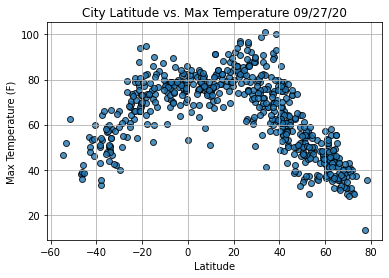

In [118]:
# Creating scatter plot for latitude Vs Maximum temperature

plt.scatter(lats,
           max_temps,
           edgecolor='black',
           linewidths=1,
           marker='o',
           alpha = 0.8,
           label='Cities')

# incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/fig01.png')

# show plot
plt.show()

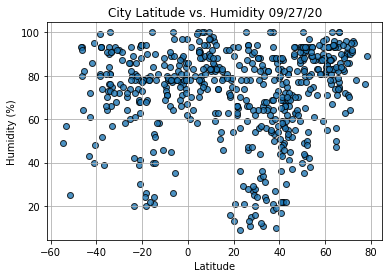

In [119]:
# LATITUDE VS HUMIDITY

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig02.png")
# Show plot.
plt.show()

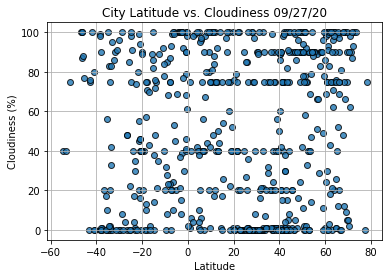

In [120]:
# LATITUDE VS CLOUDINESS

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig03.png")
# Show plot.
plt.show()

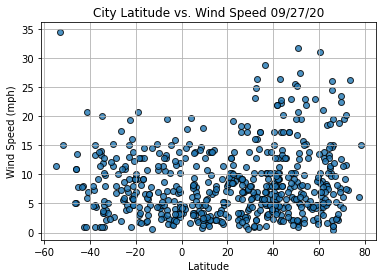

In [121]:
# LATITUDE VS WIND SPEED

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig04.png")
# Show plot.
plt.show()

In [164]:
# linear Regression to find relationships between Variables. 
# import linregress from sci.py 

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate teh regression line 'y values' from the slope and intercept. 
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line. 
    line_eq = 'y=' + str(round(slope,2)) + 'x+ ' + str(round(intercept,2))
    
    # create a scatter plot and plot the regression line.. 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    #annotate the text for the line equation. 
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()
    
    return r_value

In [165]:
# Creating Northern and Southern Hemisphere DataFrames
north_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
south_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

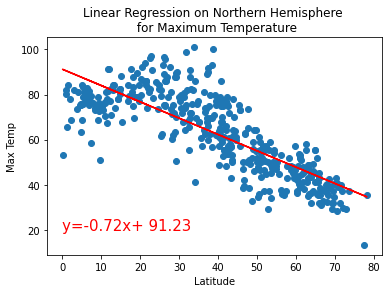

-0.797451525185728

In [166]:
# Linear regressions on the nothern hemisphere Lat Vs Max Temp
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Max Temp']

# Call the Function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (0,20))

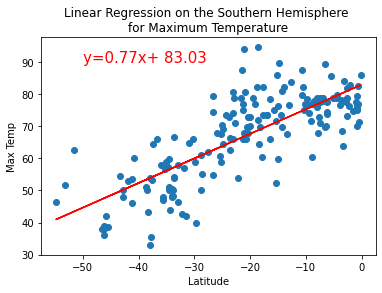

0.7762397561449451

In [168]:
# Linear regression on the Southern Hemisphere Lat Vs Max Temp
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

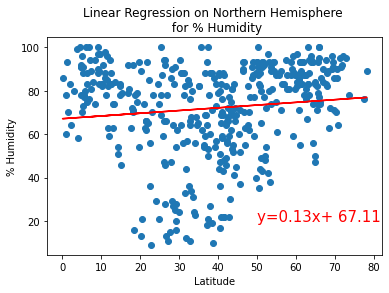

0.11431298843945144

In [170]:
# Linear regressions on the nothern hemisphere Lat Vs Humidity
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Humidity']

# Call the Function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on Northern Hemisphere \n for % Humidity', '% Humidity', (50,20))

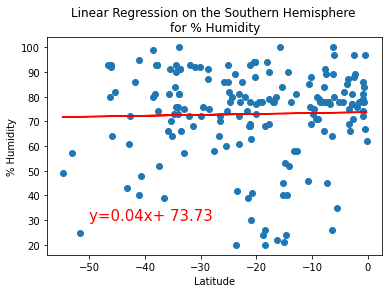

0.026398313544342567

In [172]:
# Linear regression on the Southern Hemisphere Lat Vs Humidity
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,30))

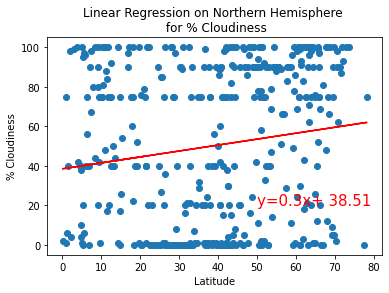

0.15054558087787714

In [175]:
# Linear regressions on the nothern hemisphere Lat Vs Cloudiness
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Cloudiness']

# Call the Function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (50,20))

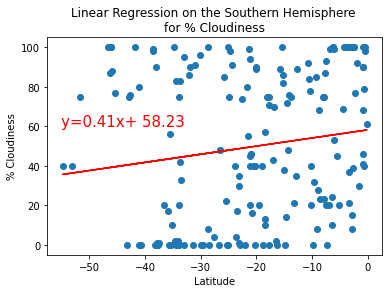

0.1508695237469773

In [177]:
# Linear regression on the Southern Hemisphere Lat Vs Cloudiness
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-55,60))

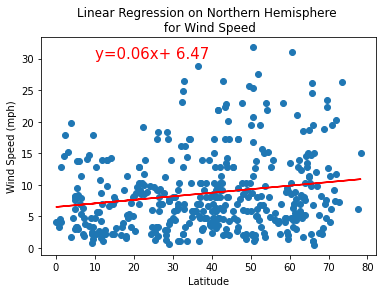

0.17981708841938607

In [179]:
# Linear regressions on the nothern hemisphere Lat Vs Wind Speed
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Wind Speed']

# Call the Function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (10,30))

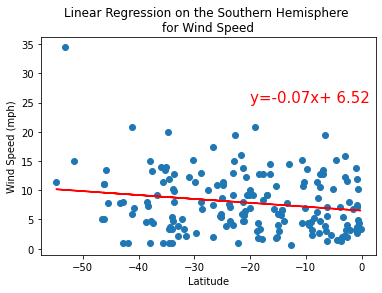

-0.17912962306337735

In [181]:
# Linear regression on the Southern Hemisphere Lat Vs Cloudiness
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(-20,25))